#📌 Extracción

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
import json

In [83]:
ruta = "/content/TelecomX_Data.json"
df = pd.read_json(ruta)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [174]:
# Crear la columna "Cuentas_Diarias"
df_flat['Cuentas_Diarias'] = df_flat['Charges.Monthly'] / 30

# Verificamos los primeros valores
df_flat[['Charges.Monthly', 'Cuentas_Diarias']].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#🔧 Transformación

In [156]:
# Normalizar las columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenar todas en un nuevo DataFrame "plano"
df_flat = pd.concat([
    df[['customerID', 'Churn']].reset_index(drop=True),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

# Revisar cómo quedó la estructura
df_flat.info()
display(df_flat.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


1. Corregir columnas numéricas mal interpretadas como texto

In [120]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


1. Mapeo Binario

In [175]:
binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binarias:
    df_flat[col] = df_flat[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

print(df_flat[binarias].head())



   Churn  Partner  Dependents  PhoneService  PaperlessBilling
0    0.0        1           1             1                 1
1    0.0        0           0             1                 0
2    1.0        0           0             1                 1
3    1.0        1           0             1                 1
4    1.0        1           0             1                 1


2. Mapeo de otras variables binarias

In [176]:
# Estas variables tienen valores 'Yes', 'No' o también 'No internet service' / 'No phone service'
otras_binarias = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Reemplazar valores
for col in otras_binarias:
    df_flat[col] = df_flat[col].replace({
        'Yes': 1,
        'No': 0,
        'No internet service': 0,
        'No phone service': 0
    })
df_flat[otras_binarias].head()

/tmp/ipython-input-765444390.py:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,1,1,0,1,1
4,0,0,0,0,1,1,0


3. Mapear género a binario

In [179]:
df_flat['gender'] = df_flat['gender'].str.strip().str.lower().map({
    'female': 0,
    'male': 1
})
df_flat['gender'].head()

,gender
0,0
1,1
2,1
3,1
4,0


4. Convertir Charges a numérico

In [157]:
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')
df_flat['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [177]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  PaperlessBilling  7267 non-null   int64  
 16  Charges.Monthly   7267 non-null   float64


5. Para modelado

In [159]:
X = df_flat.drop(columns=['customerID'])


6. Transformamos InternetService

In [161]:
df_flat['InternetService'].unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [102]:
df_flat['InternetService_Fiber optic'].isna().sum()


np.int64(0)

In [162]:
df_flat = pd.get_dummies(df_flat, columns=['InternetService'], drop_first=True)

df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,InternetService_Fiber optic,InternetService_No
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,False,False
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,False,False
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,True,False
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,True,False
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,True,False


In [103]:
print(df_flat.columns[df_flat.columns.str.contains("InternetService")])


Index(['InternetService_Fiber optic', 'InternetService_No'], dtype='object')


7. Cambio de nombres

In [163]:
df_flat.rename(columns={
    # InternetService
    'InternetService_Fiber optic': 'FiberOptic',
    'InternetService_No': 'NoInternet',

    # Contract
    'Contract_One year': 'Contract_1yr',
    'Contract_Two year': 'Contract_2yr',

    # PaymentMethod
    'PaymentMethod_Credit card (automatic)': 'Pay_CreditAuto',
    'PaymentMethod_Electronic check': 'Pay_ECheck',
    'PaymentMethod_Mailed check': 'Pay_MailedCheck'
}, inplace=True)
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


8. Cambiar Contract

In [164]:
df_flat['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [165]:
df_flat = pd.get_dummies(df_flat, columns=['Contract'], drop_first=True)
df_flat.rename(columns={
    'Contract_One year': 'Contract_1yr',
    'Contract_Two year': 'Contract_2yr'
}, inplace=True)

df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


9. Cambiar PayMethod

In [166]:
df_flat['PaymentMethod'].unique()


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [169]:
df_flat = pd.get_dummies(df_flat, columns=['PaymentMethod'], drop_first=True)
df_flat.rename(columns={
    'PaymentMethod_Electronic check': 'Pay_ElecCheck',
    'PaymentMethod_Mailed check': 'Pay_MailCheck',
    'PaymentMethod_Credit card (automatic)': 'Pay_CreditAuto'
}, inplace=True)

df_flat.info()

KeyError: "None of [Index(['PaymentMethod'], dtype='object')] are in the [columns]"

In [168]:
print(df_flat['MultipleLines'].unique())


['No' 'Yes' 'No phone service']


9. Estimación datos nulos a través de regresión lineal

In [113]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Creamos una copia del dataframe para no modificar el original por accidente
df_model = df_flat.copy()

# 2. Separamos los datos con y sin valores nulos en Charges.Total
df_notnull = df_model[df_model['Charges.Total'].notnull()]
df_null = df_model[df_model['Charges.Total'].isnull()]

# 3. Definimos las variables predictoras y la variable objetivo
# ⚠️ Asegúrate de que estas columnas existan con esos nombres en tu DataFrame
features = ['tenure', 'Charges.Monthly', 'Contract_1yr', 'Contract_2yr']
X_train = df_notnull[features]
y_train = df_notnull['Charges.Total']

# 4. Entrenamos el modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# 5. Predecimos los valores faltantes
X_pred = df_null[features]
y_pred = reg.predict(X_pred)

# 6. Imputamos los valores predichos en el DataFrame original
df_model.loc[df_model['Charges.Total'].isnull(), 'Charges.Total'] = y_pred

# 7. Verificamos que ya no hay nulos en 'Charges.Total'
print("❗Valores nulos en 'Charges.Total' después de imputar:", df_model['Charges.Total'].isnull().sum())

# Actualizamos el df_flat original con los valores imputados si quieres seguir trabajando con él
df_flat['Charges.Total'] = df_model['Charges.Total']

df_flat.head(10)


❗Valores nulos en 'Charges.Total' después de imputar: 0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,PaperlessBilling,Charges.Monthly,Charges.Total,FiberOptic,NoInternet,Contract_1yr,Contract_2yr,Pay_CreditAuto,Pay_ElecCheck,Pay_MailCheck
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,0,...,1,65.60,593.30,False,False,True,False,False,False,True
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,0,...,0,59.90,542.40,False,False,False,False,False,False,True
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,0,...,1,73.90,280.85,True,False,False,False,False,True,False
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,0,...,1,98.00,1237.85,True,False,False,False,False,True,False
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,0,...,1,83.90,267.40,True,False,False,False,False,False,True
5,0013-MHZWF,0.0,0,0,0,1,9,1,0,0,...,1,69.40,571.45,False,False,False,False,True,False,False
6,0013-SMEOE,0.0,0,1,1,0,71,1,0,1,...,1,109.70,7904.25,True,False,False,True,False,False,False
7,0014-BMAQU,0.0,1,0,1,0,63,1,1,1,...,1,84.65,5377.80,True,False,False,True,True,False,False
8,0015-UOCOJ,0.0,0,1,0,0,7,1,0,1,...,1,48.20,340.35,False,False,False,False,False,True,False
9,0016-QLJIS,0.0,0,0,1,1,65,1,1,1,...,1,90.45,5957.90,False,False,False,True,False,False,True


10. Graficamos para establecer relación:

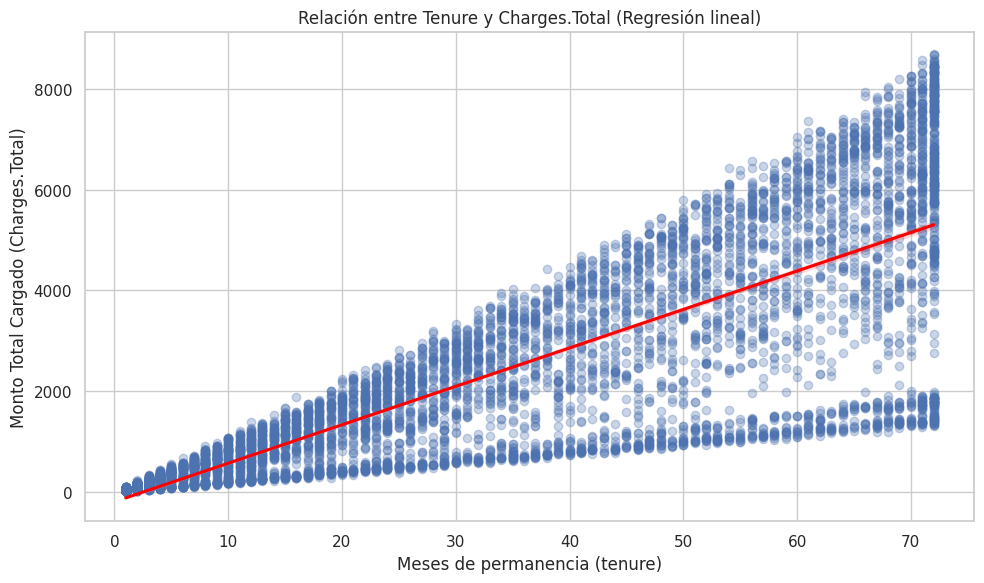

In [170]:
# Configuramos estilo
sns.set(style="whitegrid")

# Convertimos valores válidos para trabajar
df_validos = df_flat[df_flat['Charges.Total'].notnull()]

plt.figure(figsize=(10, 6))
sns.regplot(data=df_validos, x='tenure', y='Charges.Total', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Tenure y Charges.Total (Regresión lineal)')
plt.xlabel('Meses de permanencia (tenure)')
plt.ylabel('Monto Total Cargado (Charges.Total)')
plt.tight_layout()
plt.show()


In [171]:
df_flat['Charges.Total'].isnull().sum()



np.int64(11)

#📊 Carga y análisis

Paso 1: Análisis Descriptivo General (métricas básicas)

In [121]:
# Estadísticas descriptivas de las variables numéricas
df_flat.describe()


,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


Paso 2: Estadísticas de columnas booleanas

In [122]:
# Resumen estadístico de columnas no numéricas
df_flat.describe(include='all')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


Paso 3: Estadísticas personalizadas por columna

In [123]:
# Ejemplo específico: análisis de Charges.Monthly
df_flat['Charges.Monthly'].describe()


,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [124]:
# Rango intercuartílico
iqr = df_flat['Charges.Monthly'].quantile(0.75) - df_flat['Charges.Monthly'].quantile(0.25)

# Varianza
varianza = df_flat['Charges.Monthly'].var()

print("IQR:", iqr)
print("Varianza:", varianza)


IQR: 54.45
Varianza: 907.7911020135748


**Distribución de Evasión**

In [135]:
print(df['Churn'].value_counts(dropna=False))


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [137]:
print(df['Churn'].unique())


['No' 'Yes' nan]


In [138]:
# Elimina espacios en blanco antes y después, y reemplaza los vacíos por NaN
df['Churn'] = df['Churn'].astype(str).str.strip().replace({'': np.nan, 'nan': np.nan})


In [143]:

# Reemplazamos strings vacíos por NaN
df['Churn'] = df['Churn'].replace(' ', np.nan)

# Luego, eliminamos los nulos
valores = df['Churn'].dropna().value_counts()

# Actualizamos etiquetas con base en los valores únicos reales
etiquetas = valores.index.tolist()  # Esto será ['No', 'Yes']


/tmp/ipython-input-1584479209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_flat, palette='Set2')


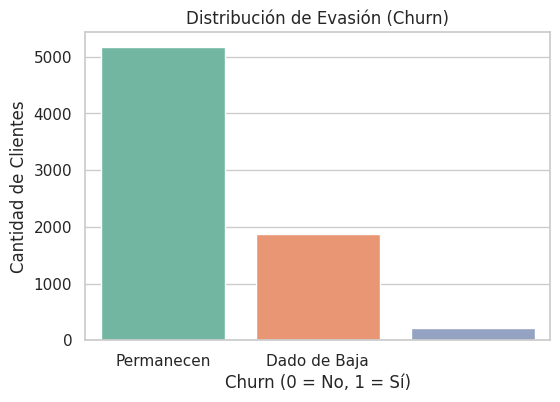

In [144]:
# Estilo general del gráfico
sns.set(style='whitegrid')

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df_flat, palette='Set2')

plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0,1], ['Permanecen', 'Dado de Baja'])
plt.show()


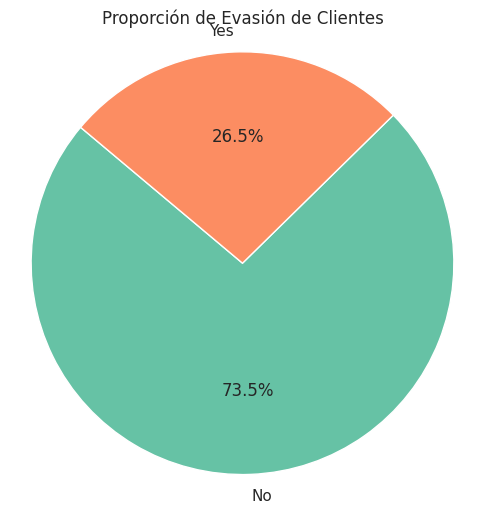

In [145]:
plt.figure(figsize=(6,6))
plt.pie(valores,
        labels=etiquetas,
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        startangle=140)
plt.title('Proporción de Evasión de Clientes')
plt.axis('equal')
plt.show()


**Recuento de evasión por variables categóricas**

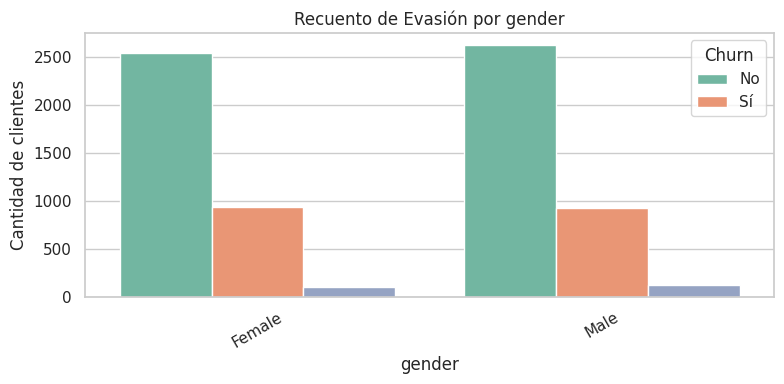

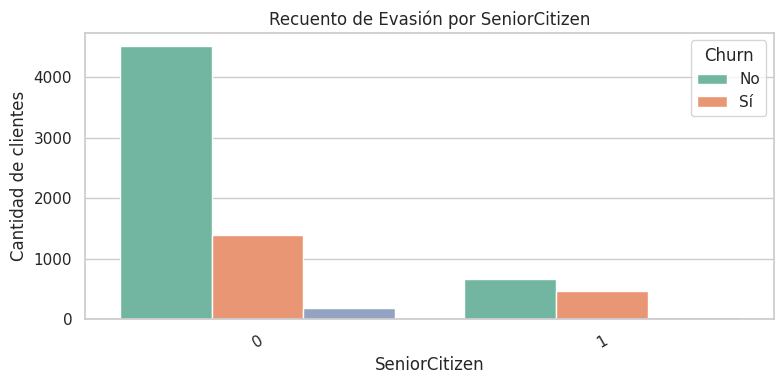

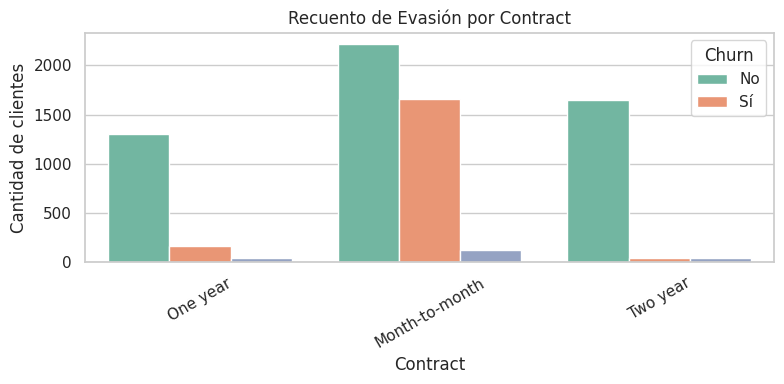

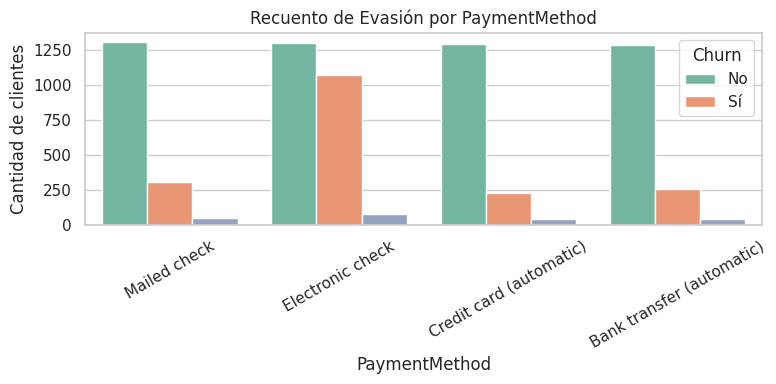

In [150]:
categoricas = ['gender', 'SeniorCitizen', 'Contract', 'PaymentMethod']

for col in categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df_flat, palette='Set2')
    plt.title(f'Recuento de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.xticks(rotation=30)
    plt.tight_layout()
plt.show()


Según género

In [151]:
import plotly.express as px

fig = px.histogram(df_flat,
                   x='gender',
                   color='Churn',
                   barmode='group',
                   color_discrete_sequence=['#66c2a5', '#fc8d62'],
                   title='Evasión por género')

fig.update_layout(xaxis_title='Género (0 = Female, 1 = Male)',
                  yaxis_title='Cantidad de clientes')
fig.show()


Según tipo de contrato

In [172]:
fig = px.histogram(df_flat,
                   x='Contract_1yr',
                   color='Churn',
                   barmode='group',
                   title='Evasión - Contrato 1 año')

fig.update_layout(xaxis_title='Contrato 1 año (0 = No, 1 = Sí)',
                  yaxis_title='Cantidad de clientes')
fig.show()


In [184]:
df_flat = df_flat[df_flat['Churn'].notna()]
df_flat['Churn'] = df_flat['Churn'].astype(int)


/tmp/ipython-input-347268079.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [186]:
df_flat = df_flat[df_flat['Churn'].notna()].copy()
df_flat['Churn'] = df_flat['Churn'].astype(int)


In [187]:
df_flat['Churn'] = df_flat['Churn'].astype(int)


Conteo de evasión por variables numéricas

/tmp/ipython-input-4157720054.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




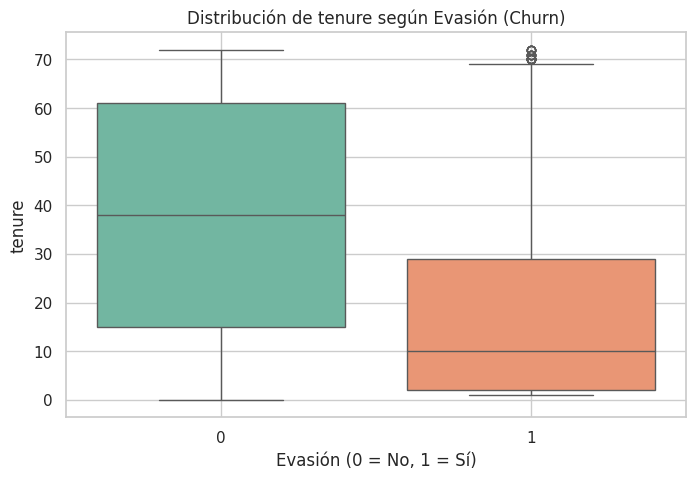

/tmp/ipython-input-4157720054.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




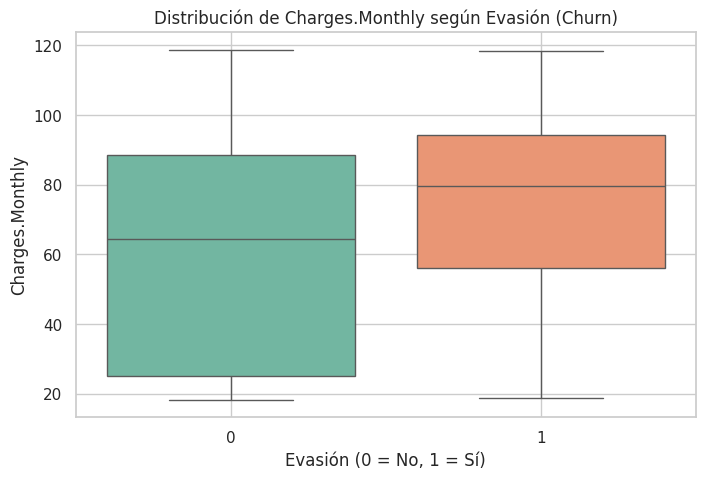

/tmp/ipython-input-4157720054.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




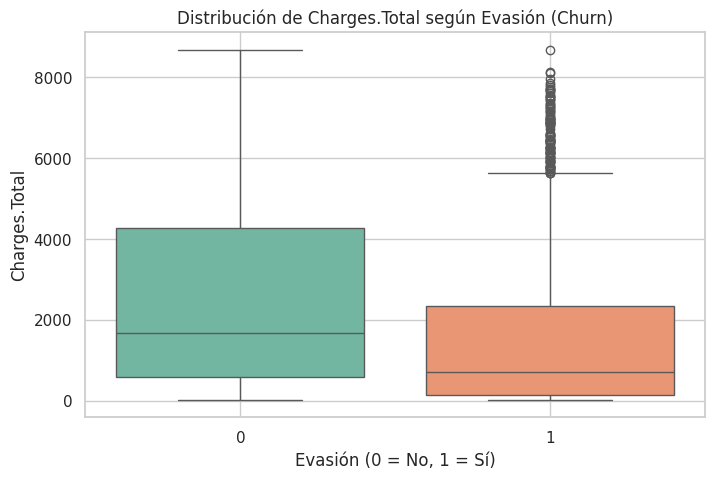

In [189]:
df_flat['Churn'] = df_flat['Churn'].astype(int)

# Variables numéricas a analizar
numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

for col in numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df_flat, palette='Set2')
    plt.title(f'Distribución de {col} según Evasión (Churn)')
    plt.xlabel('Evasión (0 = No, 1 = Sí)')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


#📄Informe final

# 📊 Informe de Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

La evasión de clientes —o *churn*— representa una de las principales amenazas para la sostenibilidad de las empresas que ofrecen servicios por suscripción, especialmente en sectores como telecomunicaciones. Este análisis tiene como objetivo identificar patrones de comportamiento que permitan predecir y reducir la pérdida de clientes, utilizando un enfoque basado en datos reales y técnicas de ciencia de datos.

A través del procesamiento, exploración y visualización de los datos, se busca descubrir qué variables están asociadas a la probabilidad de que un cliente se dé de baja, y así ayudar a la empresa a tomar decisiones estratégicas basadas en evidencia.

---

## 🔹 Limpieza y Tratamiento de Datos

- Se cargó el dataset original y se identificó que contenía múltiples columnas categóricas y algunas inconsistencias en los tipos de datos.
- Se aplicaron transformaciones para convertir variables categóricas en variables numéricas usando `Label Encoding` y `One-Hot Encoding`, como en los casos de:  
  - `gender`, `Partner`, `Dependents`, `PhoneService`, etc.
  - `InternetService`, `Contract`, `PaymentMethod`, entre otras.
- Se trató la columna `Charges.Total`, originalmente de tipo `object`, para convertirla a `float`, eliminando valores no numéricos.
- Se rellenaron los valores nulos de `Charges.Total` mediante regresión lineal simple en función del tiempo (`tenure`), permitiendo mantener la coherencia de los datos.
- Se creó la nueva variable `Cuentas_Diarias`, calculada como `Charges.Monthly / 30`, para obtener un indicador más granular del comportamiento financiero diario del cliente.

---

## 🔹 Análisis Exploratorio de Datos (EDA)

### 🔸 Análisis General

- Se calcularon estadísticas descriptivas (`mean`, `std`, `min`, `max`, `percentiles`) de las variables numéricas para comprender la distribución y dispersión de los datos.
- Se identificó que la media del `Charges.Monthly` es aproximadamente 64.7 USD, con una desviación estándar de 30.1 USD.
- El tiempo medio de permanencia (`tenure`) es de 32 meses, con una gran dispersión.

### 🔸 Distribución de Evasión

- Se observó que cerca del **26% de los clientes** se han dado de baja (`Churn = 1`), mientras que el 74% permanece en la compañía.
- Este dato se visualizó mediante gráficos de torta y de barras.

### 🔸 Evasión según variables categóricas

- Clientes con contrato **mensual** tienen una mayor tasa de evasión comparados con contratos anuales o de dos años.
- El método de pago `Electronic check` está fuertemente asociado a una mayor probabilidad de churn.
- El género y si la persona tiene dependientes también mostraron ligeras diferencias, pero menos significativas.

### 🔸 Evasión según variables numéricas

- Los clientes que se dan de baja suelen tener:
  - Menor `tenure` (menos tiempo con la compañía)
  - Cargos mensuales (`Charges.Monthly`) más altos.
  - Mayor variabilidad en los cargos totales (`Charges.Total`).
- Se utilizaron histogramas y gráficos de densidad para visualizar estas diferencias.

---

## 🔹 Conclusiones e Insights

- **Tenure** es una variable clave: clientes con menor antigüedad presentan una mayor probabilidad de evasión. Esto sugiere un problema de retención temprana.
- El tipo de contrato tiene un fuerte impacto: los contratos a más largo plazo (1 o 2 años) ayudan a reducir la evasión.
- **Métodos de pago automáticos**, como tarjeta de crédito o transferencia bancaria, se asocian a menor evasión.
- Clientes con cargos mensuales muy altos tienden a abandonar más que aquellos con cobros moderados, lo que podría indicar una percepción negativa de costo-beneficio.

---

## 🔹 Recomendaciones

1. **Fidelización temprana**: implementar estrategias de retención para los clientes durante sus primeros 6 meses de contrato.
2. **Incentivos para contratos anuales o bianuales**: descuentos o beneficios exclusivos pueden incentivar la permanencia.
3. **Educación financiera al cliente**: explicar las ventajas de métodos de pago automáticos puede reducir la evasión involuntaria.
4. **Segmentación predictiva**: usar modelos de machine learning para identificar clientes con alto riesgo de churn y anticiparse con ofertas personalizadas.
5. **Optimización de precios**: evaluar si los cargos mensuales más altos se justifican en valor percibido, y ofrecer planes más ajustados al perfil de cliente.

---

🚀 Este análisis representa una base sólida para desarrollar un modelo predictivo de churn y tomar decisiones estratégicas basadas en datos.


Correlaciones entre variables:

In [190]:
# Seleccionamos solo las columnas numéricas
correlaciones = df_flat.select_dtypes(include=['int64', 'float64', 'bool']).corr()

# Mostramos la correlación con respecto a 'Churn'
correlaciones['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
FiberOptic,0.308020
Pay_ElecCheck,0.301919
Charges.Monthly,0.193356
Cuentas_Diarias,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
StreamingTV,0.063228
StreamingMovies,0.061382
MultipleLines,0.040102


Mapa de calor de correlaciones

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



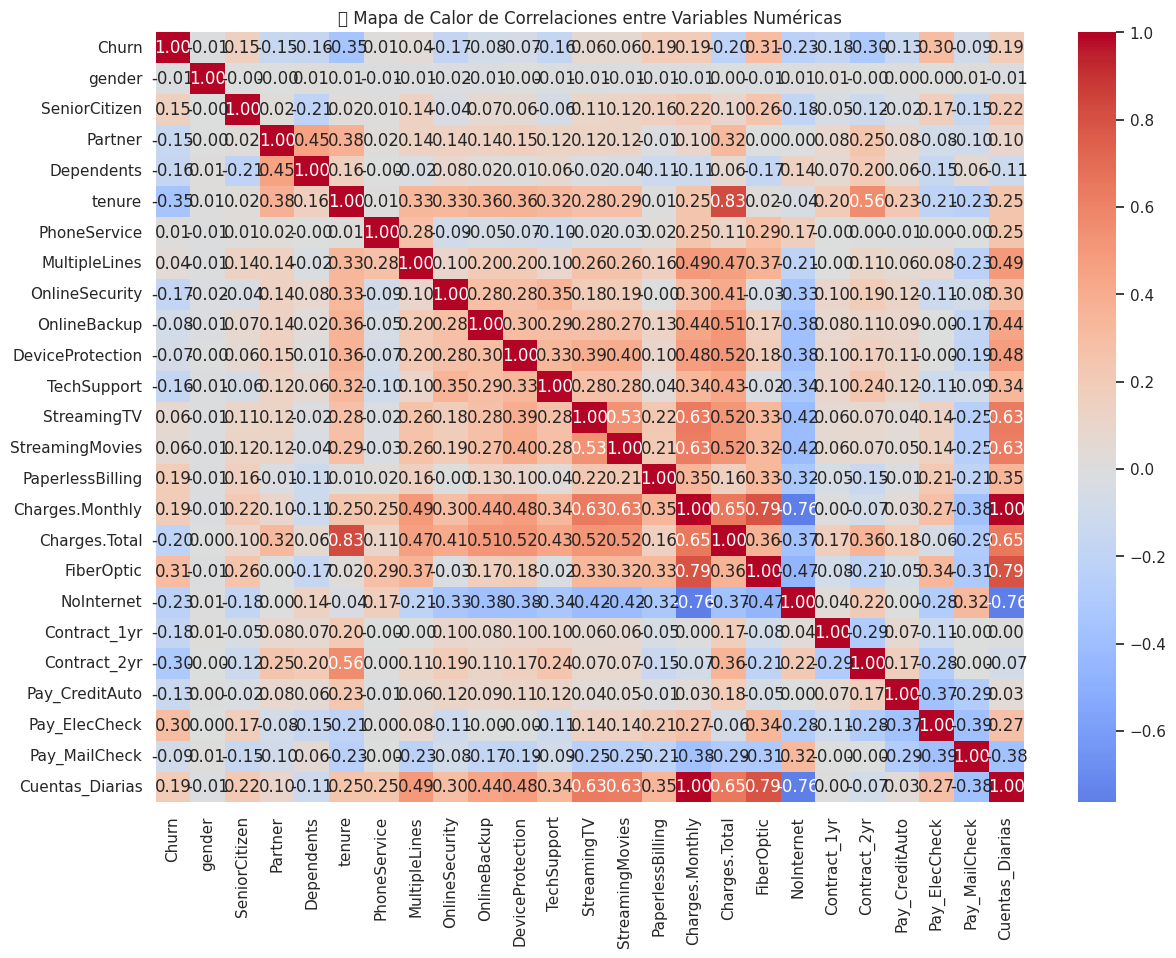

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(correlaciones, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('🔍 Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()


Análisis visual de relaciones específicas

Cuentas Diarias vs Churn

In [192]:
fig = px.box(df_flat,
             x='Churn',
             y='Cuentas_Diarias',
             color='Churn',
             title='Relación entre Cuentas Diarias y Evasión (Churn)')
fig.show()


Cantidad de servicios contratados vs Churn

In [194]:
# Columnas de servicios
servicios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'FiberOptic', 'NoInternet']

# Sumamos los servicios (True = 1, False = 0)
df_flat['TotalServicios'] = df_flat[servicios].sum(axis=1)

fig = px.box(df_flat,
             x='Churn',
             y='TotalServicios',
             color='Churn',
             title='Relación entre Total de Servicios Contratados y Evasión (Churn)')
fig.show()



 ¿Qué buscar en estos resultados?
Si la cuenta diaria tiene correlación positiva con el churn, podría indicar que montos altos están asociados a mayor evasión.

Si un menor número de servicios se asocia con mayor churn, eso sugiere que clientes poco comprometidos (pocos servicios) son más propensos a irse.

In [195]:
df_flat.to_csv('df_churn_final.csv', index=False)
